In [1]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded=files.upload()


Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


In [2]:
file_name =list(uploaded.keys())[0]
df=pd.read_csv(file_name)
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
df.isna()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False


In [4]:
#corelation of relevent columns
features=df[['Price','Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight']]
features.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


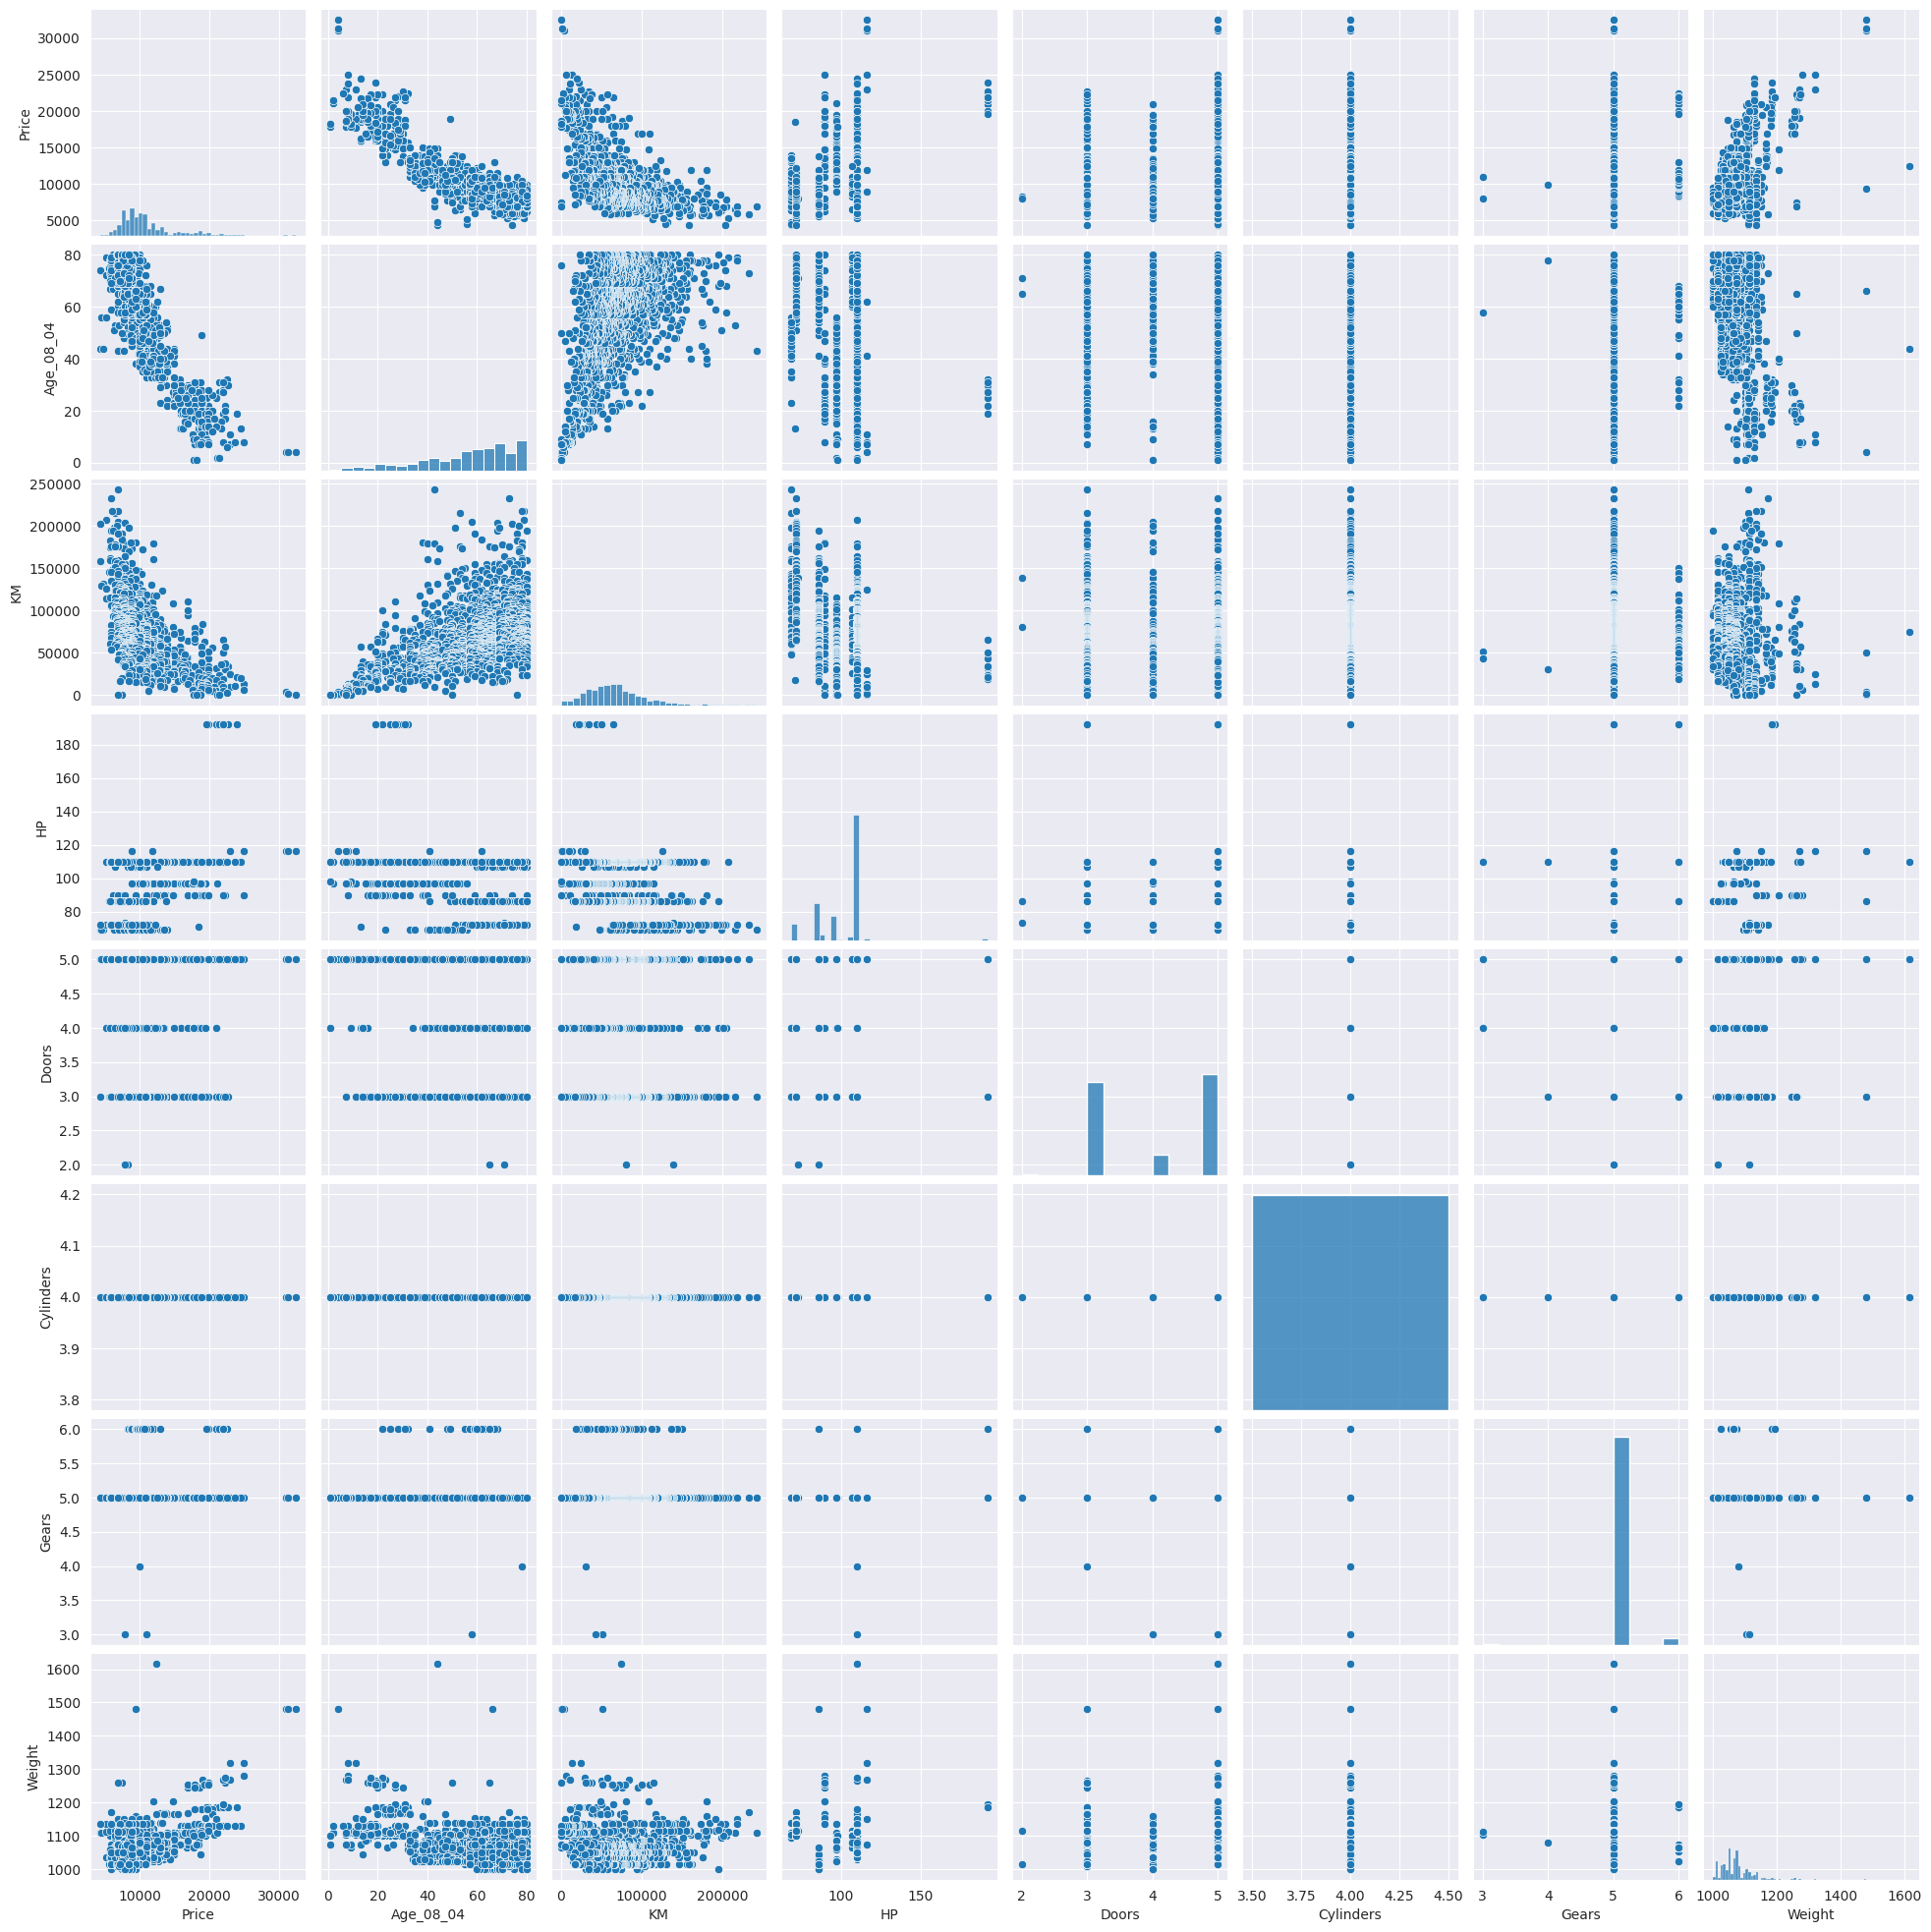

In [5]:
#scatter plot for every attribute
sns.set_style('darkgrid')
sns.pairplot(features)

In [8]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=df).fit()
model.params

,0
Intercept,-6984.373566
Age_08_04,-122.242218
KM,-0.019994
HP,28.350149
Doors,-9.680229
Gears,622.282925
Weight,18.609651


In [9]:
#t and p values
print(model.tvalues,'\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [10]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

In [11]:
ml_a=smf.ols('Price~Age_08_04',data=df).fit()
print(ml_a.tvalues,'\n', ml_a.pvalues)
(ml_a.rsquared,ml_a.rsquared_adj)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


(0.7684108996825327, 0.7682494010072765)

In [12]:
ml_k=smf.ols('Price~KM',data=df).fit()
print(ml_k.tvalues,'\n', ml_k.pvalues)
(ml_k.rsquared,ml_k.rsquared_adj)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


(0.3248545891553042, 0.3243837764559704)

In [13]:
ml_h=smf.ols('Price~HP',data=df).fit()
print(ml_h.tvalues,'\n', ml_h.pvalues)
(ml_h.rsquared,ml_h.rsquared_adj)


Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


(0.09921859277665868, 0.09859043279951551)

In [14]:
ml_d=smf.ols('Price~Doors',data=df).fit()
print(ml_d.tvalues,'\n', ml_d.pvalues)
(ml_d.rsquared,ml_d.rsquared_adj)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


(0.03434555943109807, 0.03367216023962749)

In [15]:
ml_g=smf.ols('Price~Gears',data=df).fit()
print(ml_g.tvalues,'\n', ml_g.pvalues)
(ml_g.rsquared,ml_g.rsquared_adj)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


(0.003982096785360878, 0.003287523631096967)

In [16]:
ml_w=smf.ols('Price~Weight',data=df).fit()
print(ml_w.tvalues,'\n', ml_w.pvalues)
(ml_w.rsquared,ml_w.rsquared_adj)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


(0.33779063704356416, 0.33732884529812734)

In [19]:
import statsmodels.formula.api as smf
model2=smf.ols('Price~Age_08_04+KM+Weight',data=df).fit()
model2.params

,0
Intercept,-1880.335564
Age_08_04,-120.221174
KM,-0.024183
Weight,19.576043


In [20]:
model2.params

,0
Intercept,-1880.335564
Age_08_04,-120.221174
KM,-0.024183
Weight,19.576043


In [21]:
#new t and p values
print(model2.tvalues,'\n', model.pvalues)

Intercept    -1.953153
Age_08_04   -43.841468
KM          -20.141779
Weight       23.409444
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

In [23]:
(model2.rsquared,model2.rsquared_adj)

(0.848104243893788, 0.8477860265276438)

In [24]:
#calculating vif
rsq_age=smf.ols('Age_08_04~KM+HP+Doors+Gears+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age_08_04+HP+Doors+Gears+Weight',data=df).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age_08_04+KM+Doors+Gears+Weight',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_doors=smf.ols('Doors~Age_08_04+KM+HP+Gears+Weight',data=df).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age_08_04+KM+HP+Doors+Weight',data=df).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_weight=smf.ols('Weight~Age_08_04+KM+HP+Doors+Gears',data=df).fit().rsquared
vif_weight=1/(1-rsq_weight)

#store vif in a dataframe
d1={'Variables':['Age_08_04','KM','HP','Doors','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_gears,vif_weight]}
d1

{'Variables': ['Age_08_04', 'KM', 'HP', 'Doors', 'Gears', 'Weight'],
 'VIF': [1.874541812783019,
  1.627039368280016,
  1.2149093333159122,
  1.1493006316049685,
  1.0965010117522822,
  1.5080408420130476]}

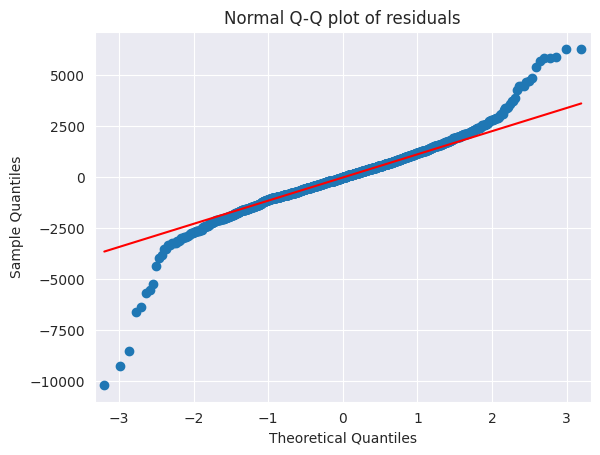

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model2.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

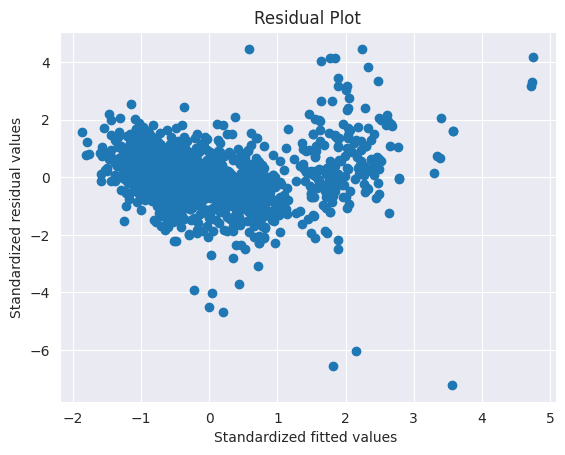

In [26]:
#residual plot for homoscedasticity
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model2.fittedvalues),get_standardized_values(model2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values ')
plt.ylabel('Standardized residual values')

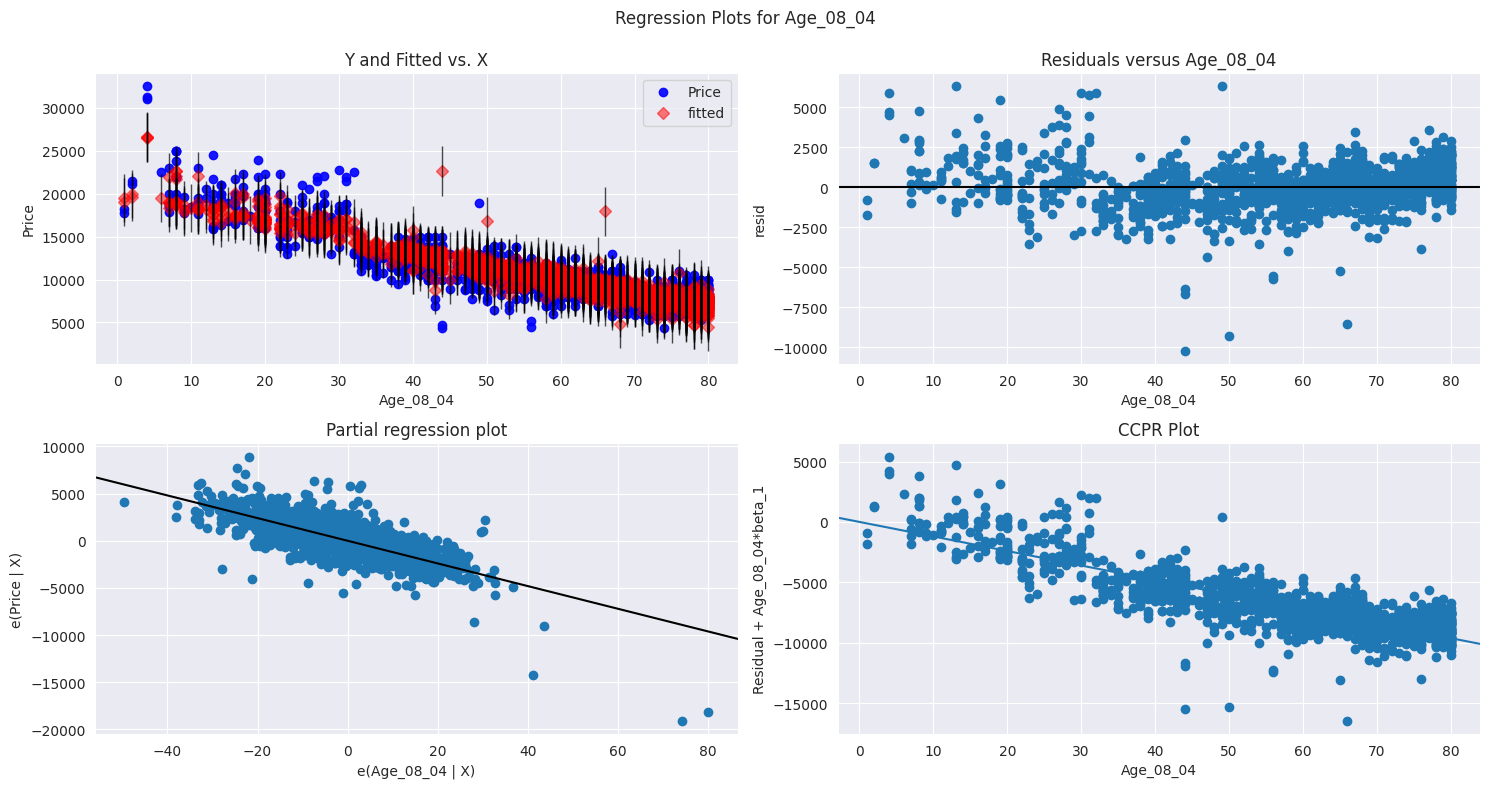

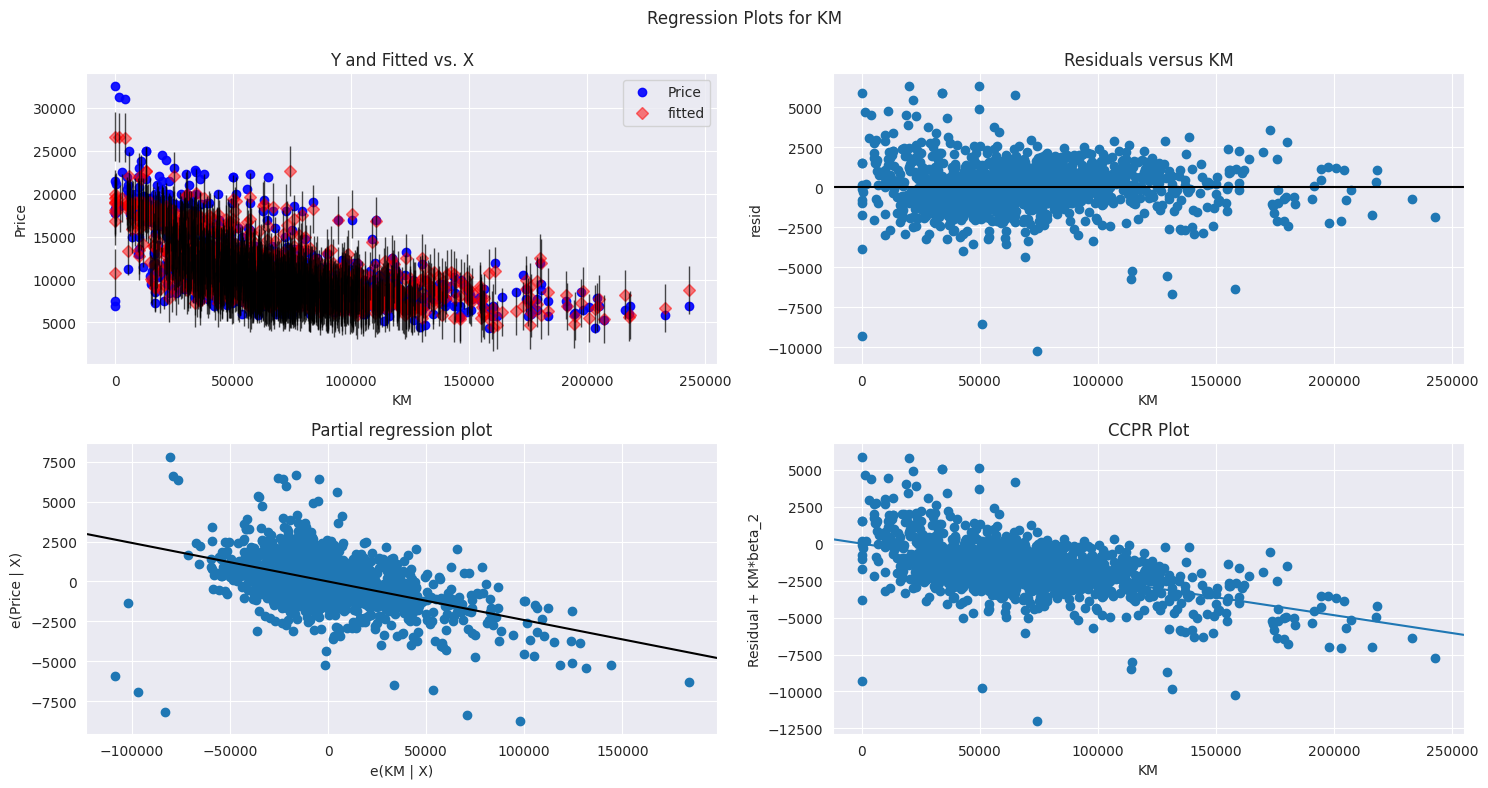

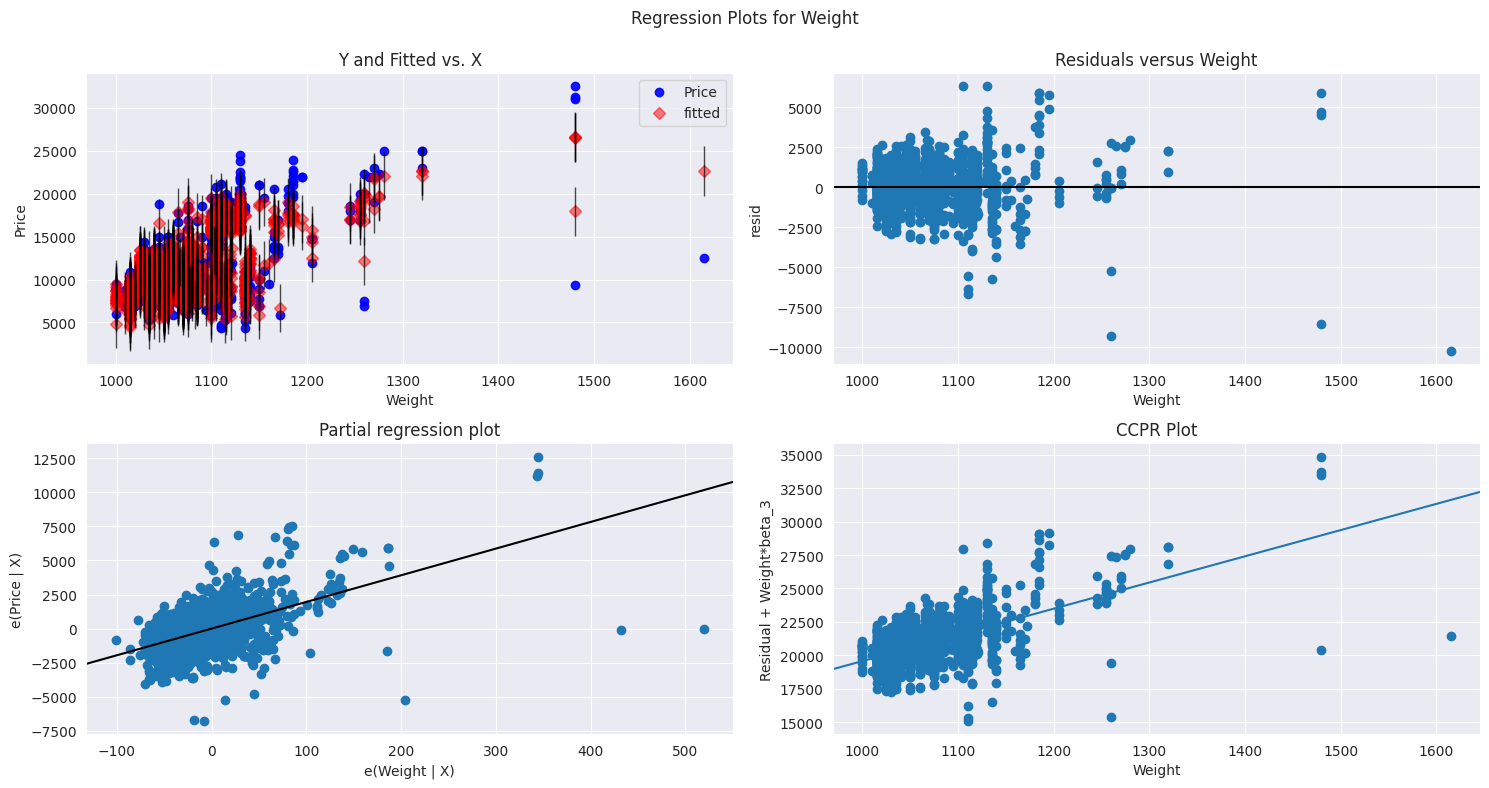

In [27]:

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model2,'Age_08_04',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model2,'KM',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model2,'Weight',fig=fig)